<a href="https://colab.research.google.com/github/sandovalmedeiros/PythonGeo/blob/main/ELT574_115183_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT574 - Aprendizado de Máquinas**
**Curso de Especialização em Inteligência Artificial e Computacional**



## Semana 3 - Redes Neurais Artificiais - Dados Atividade 3

### Enunciado da Atividade

Crie um Notebook no Google Colab com o nome [ELT574 <Matrícula> Atividade 3], modificando o campo <Matrícula> pela sua matrícula do Sapiens (Exemplo: ELT574 12700-0 Atividade 3).

Conforme o roteiro abaixo, responda os questionamento e implemente rotinas para realizar os cálculos necessários.

Utilize o notebook disponibilizado para o problema de classificação multiclasse Fashion MNIST e, ajustando diferentes hiperparâmetros de treinamento, tente atingir 90% de acurácia nas inferências.

Apresente o gráfico de treinamento e validação da função de loss.

Caso não consiga atingir este nível de precisão, mostre qual foi seu melhor resultado.

Todas as questões devem ser inseridas no notebook do Google Colab. O link para o notebook deve ser enviado como resposta da tarefa.




Preparação do ambiente de programação e importação das principais bibliotecas.

In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
from google.colab import drive
drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

### Aula 03 - Redes perceptron multicamadas (classificação)

Construindo modelos de rede perceptron multicamadas com a biblioteca Keras do TensorFlow

In [2]:
import tensorflow as tf
from tensorflow import keras

##### Classificador de imagens com Keras

Vamos utilizar o dataset fashion MNIST. O MNIST é um dataset de imagens para problemas de classificação multiclasse.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

Este dataset já contem os dados de treinamento e teste separados. O dataset de treinamento é composto por 60.000 imagens com 28x28 pixels.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

Já o dataset de teste é composto por 10.000 imagens de 28x28 pixels.

In [ ]:
X_test.shape

Cada pixel das imagens é representado por um valor em escala de cinza, que vai de 0 a 255. O tipo das entradas é inteira, sem sinal, de 8 bits.

In [ ]:
X_train_full.dtype

###### Separando os dados para validação durante o treinamento

Vamos dividir o dataset de treinamento para separmos um conjunto de validação que será utilizado durante o treinamento. Como o valor máximo de cada pixel pode ser 255, vamos normalizar o valor dos pixels para um valor float entre 0 e 1.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Podemos plotar as imagens do dataset utilizando o `imshow()` da biblioteca `matplotlib` com a cor em escala de cinza (mapeamento binário, `'binary'`).





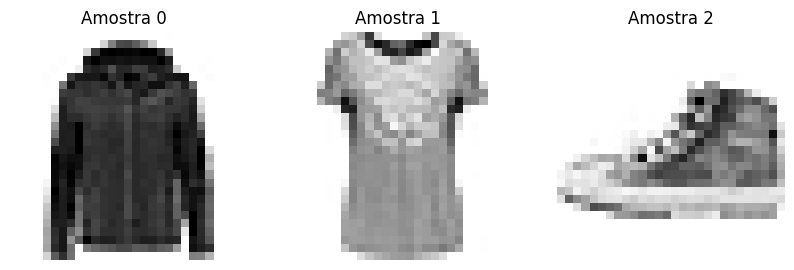

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Repare abaixo que os valores armazenados para o rótulo das classes são valores numéricos. Cada classe possui um número que representa:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [9]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[4 0 7 ... 3 0 5]


Sendo assim, a primeira imagem do dataset de treinamento é:

In [10]:
class_names[y_train[0]]

'Coat'

Algumas das imagens do dataset de treinamento:

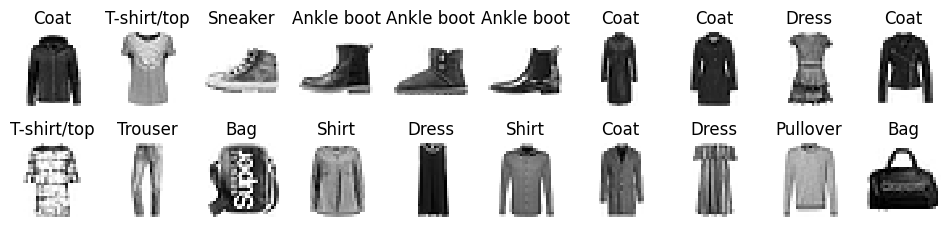

In [11]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### Criando o modelo de PMC

Vamos criar um modelo de PMC para classificar as amostras! Como é um problema com imagens, vamos ajustar uma rede com duas camadas escondidas.

In [12]:
# Criando o modelo de PMC
## Declaracao do modelo sequencial para o Keras
model = keras.models.Sequential()
## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
model.add(keras.layers.Flatten(input_shape=[28, 28]))
## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;
### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
model.add(keras.layers.Dense(300, activation="relu"))
## Segunda camada escondida, com 100 neuronios e ReLU
model.add(keras.layers.Dense(100, activation="relu"))
## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
model.add(keras.layers.Dense(10, activation="softmax"))

Outra maneira de declarar o modelo sequencial com Keras poderia ser:

In [13]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

A estrutura do modelo pode ser verificada por:

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


E as camadas do modelo por:

In [15]:
model.layers

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [16]:
hidden1 = model.layers[1]
hidden1

Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02161694,  0.01178154, -0.04121796, ..., -0.04648932,
         0.05604285, -0.02655052],
       [ 0.0522376 ,  0.06208152, -0.07075138, ..., -0.06336199,
         0.06668243,  0.04883627],
       [ 0.04859541,  0.06325823,  0.02670675, ...,  0.06935956,
        -0.01557212, -0.0237989 ],
       ...,
       [ 0.03740723,  0.06821574, -0.03054694, ...,  0.05227587,
        -0.02098771,  0.05909956],
       [-0.04551466,  0.03446861, -0.02541753, ...,  0.05676956,
        -0.02959119, -0.03000631],
       [ 0.01914719, -0.0237851 ,  0.02305635, ...,  0.06194113,
         0.03767584,  0.05149046]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

###### Treinando o modelo de PMC

O treinamento do modelo é feito utilizando o método `'fit()'` para a classe model.

In [36]:
history = model.fit(X_train,y_train, epochs=30,
                    validation_split=0.1)    #validation_data=(X_valid,y_valid))

Epoch 1/30
1547/1547 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.9586 - val_loss: 0.3240 - val_accuracy: 0.8993
Epoch 2/30
1547/1547 [==============================] - 3s 2ms/step - loss: 0.1127 - accuracy: 0.9615 - val_loss: 0.3676 - val_accuracy: 0.8971
Epoch 3/30
1547/1547 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9632 - val_loss: 0.3325 - val_accuracy: 0.8998
Epoch 4/30
1547/1547 [==============================] - 4s 3ms/step - loss: 0.1017 - accuracy: 0.9647 - val_loss: 0.3179 - val_accuracy: 0.9024
Epoch 5/30
1547/1547 [==============================] - 3s 2ms/step - loss: 0.0958 - accuracy: 0.9666 - val_loss: 0.3098 - val_accuracy: 0.9035
Epoch 6/30
1547/1547 [==============================] - 4s 2ms/step - loss: 0.0925 - accuracy: 0.9682 - val_loss: 0.3199 - val_accuracy: 0.9022
Epoch 7/30
1547/1547 [==============================] - 4s 3ms/step - loss: 0.0905 - accuracy: 0.9688 - val_loss: 0.3209 - val_accuracy:

Outra forma de dividir o dataset para treinamento e validação (ao invés de usar o argumento `validation_data`) é utilizar o argumento `validation_split=0.1` para passar a quantidade de dados que devem ser utilizados para a validação durante a fase de treinamento.

###### Analisando os resultados do treinamento

O treinamento do modelo armazenou o histórico de todas as épocas no dicionário `history`. Podemos transformar este dicionário em um DataFrame do Pandas e manipular os dados dele para identificar o melhor modelo treinado.

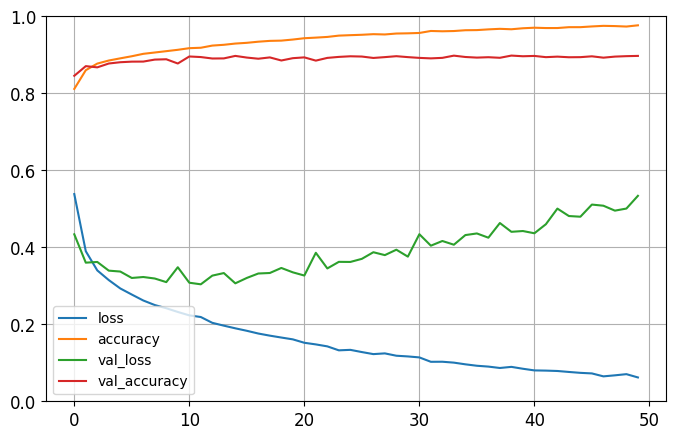

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Conseguimos um bom desempenho com este modelo e sem uma tendência de overfitting. Podemos ver isto porque o `loss` e o `val_loss`continuam diminuindo, apesar do `val_loss` estar com uma inclinação quase nula no final da última época treinada. Se o modelo continuasse o ajuste dos parâmetros, o `loss` continuaria descendo, mas, provavelmente, o `val_accuraccy` deixaria de acompanhar o `accuraccy` de treinamento.

Se o comportamento do modelo não foi satisfatório ainda depois do treinamento, podemos alterar os hiperparâmetros de treinamento, começando pela taxa de aprendizagem, o otimizador, número de camadas, número de neurônios por camada e os tipos de função de ativação.

Uma vez satisfeito com o modelo, podemos utilizar o dataset de teste para verificar mais uma vez o desempenho do PMC.

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8871


[0.45309847593307495, 0.8870999813079834]

###### Utilizando o modelo para fazer predições

Acertado o modelo, podemos começar a fazer predições para aplicação. Vamos tomar algumas amostras do dataset de teste para verificar as predições.

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
list(y_test[:3])

[9, 2, 1]

In [26]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [42]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [43]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

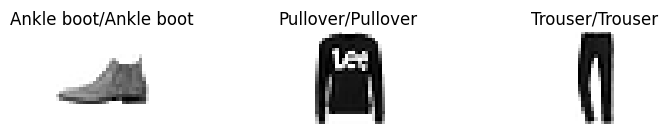

In [44]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Carregar o Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Pré-processamento dos dados
train_images = train_images / 255.0
test_images = test_images / 255.0

# Definir o modelo
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compilar o modelo
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Definir hiperparâmetros de treinamento
batch_size = 128
epochs = 120

# Treinar o modelo
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_split=0.2, verbose=1)

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Acurácia no conjunto de teste:", test_accuracy)



Epoch 1/120
375/375 [==============================] - 4s 8ms/step - loss: 0.5109 - accuracy: 0.8193 - val_loss: 0.4047 - val_accuracy: 0.8573
Epoch 2/120
375/375 [==============================] - 3s 7ms/step - loss: 0.3733 - accuracy: 0.8653 - val_loss: 0.3746 - val_accuracy: 0.8673
Epoch 3/120
375/375 [==============================] - 4s 10ms/step - loss: 0.3249 - accuracy: 0.8811 - val_loss: 0.3554 - val_accuracy: 0.8721
Epoch 4/120
375/375 [==============================] - 3s 8ms/step - loss: 0.3036 - accuracy: 0.8872 - val_loss: 0.3397 - val_accuracy: 0.8775
Epoch 5/120
375/375 [==============================] - 3s 7ms/step - loss: 0.2839 - accuracy: 0.8938 - val_loss: 0.3134 - val_accuracy: 0.8866
Epoch 6/120
375/375 [==============================] - 3s 7ms/step - loss: 0.2666 - accuracy: 0.9002 - val_loss: 0.3042 - val_accuracy: 0.8925
Epoch 7/120
375/375 [==============================] - 3s 7ms/step - loss: 0.2609 - accuracy: 0.9025 - val_loss: 0.3191 - val_accuracy: 0.885

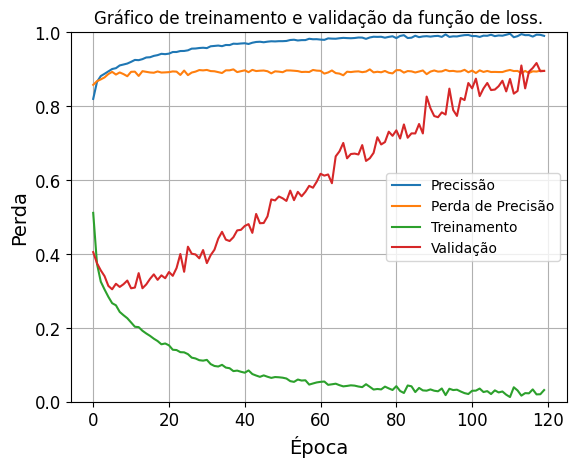

In [79]:
# Gráfico de treinamento e validação da função de loss
# plt.plot(figsize=(5,4))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Gráfico de treinamento e validação da função de loss.")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend(["Precissão","Perda de Precisão","Treinamento", "Validação"])
plt.show()

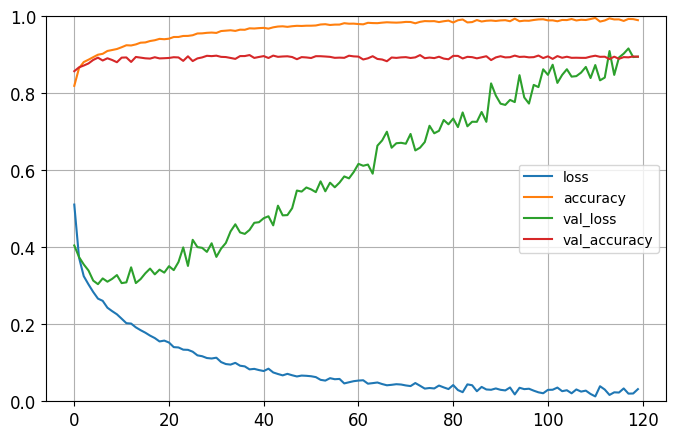

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()



---


---



---




---



---



---



---

